# Principal Component Analysis (PCA)

In this module, we will compare two ways of doing dimensionality reduction, one of them is PCA and the other is the common way (Gini and correlation). Evaluation will take a place to see which are perform better on the test set

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score

## Load the dataset

In [3]:
data = pd.read_csv('Wine.csv')
data = data[data['Customer_Segment']!=3]
data['Customer_Segment'] = data['Customer_Segment'].apply(lambda x: 1 if x == 2 else 0)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values #Customer_Segment

In [4]:
data.shape

(130, 14)

In [123]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [5]:
data['Customer_Segment'].value_counts()

1    71
0    59
Name: Customer_Segment, dtype: int64

In [6]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Alcohol,130.0,12.944077,0.888769,11.03,12.2275,13.010,13.7275,14.83
Malic_Acid,130.0,1.968077,0.879968,0.74,1.5100,1.730,2.0575,5.80
Ash,130.0,2.340462,0.297162,1.36,2.1700,2.320,2.5275,3.23
Ash_Alcanity,130.0,18.785385,3.400459,10.60,16.5250,18.550,20.9500,30.00
Magnesium,130.0,99.900000,15.381379,70.00,88.0000,98.000,108.0000,162.00
Total_Phenols,130.0,2.522692,0.545393,1.10,2.1475,2.560,2.9375,3.88
Flavanoids,130.0,2.490000,0.737765,0.57,2.0025,2.565,2.9975,5.08
Nonflavanoid_Phenols,130.0,0.330231,0.109087,0.13,0.2600,0.300,0.3975,0.66
Proanthocyanins,130.0,1.752385,0.539572,0.41,1.4225,1.705,2.0050,3.58
Color_Intensity,130.0,4.194769,1.625782,1.28,2.8625,3.870,5.3750,8.90


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Selection Comparison

## 1. Applying Feature Elimination

In [10]:
# two metrics to evaluate: Gini and Correlation
def gini(y_true, y_pred, sample_weight=None):
    """
    Returns Gini coefficient (2*AUC-1 )
    """
    return 2*roc_auc_score(y_true, y_pred, sample_weight=sample_weight)-1

In [11]:
power_tab = []
for j in range(0,len(data.columns)):
    power_tab.append({'Name':data.columns[j]
                    ,'Gini':gini(data.loc[:,'Customer_Segment'],data.loc[:,data.columns[j]])  
                     })
power_out = pd.DataFrame.from_records(power_tab)
power_out = power_out.set_index('Name').abs()
power_out = power_out.sort_values('Gini',ascending=False)

pd.options.display.max_rows = 1000
display(power_out)
pd.options.display.max_rows = 30

,Gini
Name,
Customer_Segment,1.000000
Proline,0.973263
Alcohol,0.947720
Color_Intensity,0.893531
Flavanoids,0.771067
Total_Phenols,0.626164
Magnesium,0.614466
Ash_Alcanity,0.583433
Ash,0.427310


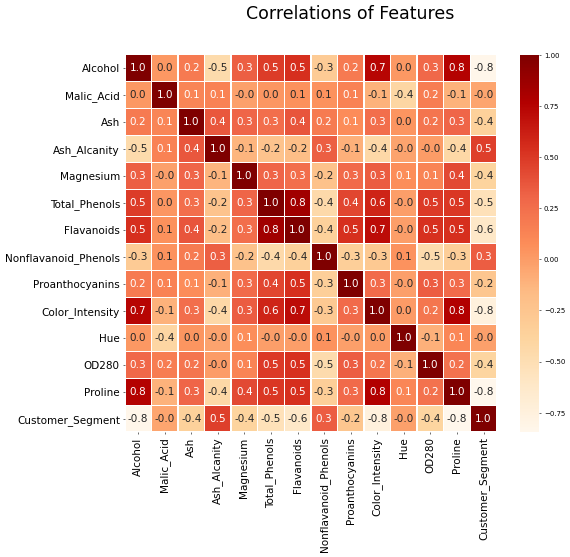

In [12]:
cormat = data.corr()

fig, ax = plt.subplots(figsize=(12,10), dpi=50)
fig.suptitle('Correlations of Features',fontsize=25)
sns.heatmap(cormat, ax=ax, annot=True, fmt="0.1f", linewidths=.5, annot_kws={"size":15},cmap="OrRd")

plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [13]:
max_ok_correlation = 0.5

# find highest pairwise correlation
hicors = []
for i in range(0,len(cormat)):
    for j in range(0,len(cormat)):
        if ((cormat.iloc[i][j] > max_ok_correlation or cormat.iloc[i][j] < -max_ok_correlation) and i < j):
            hicors.append((i,j,cormat.index[i],cormat.index[j],cormat.iloc[i][j],abs(cormat.iloc[i][j])))
hicors.sort(key= lambda x: x[5], reverse=True)

hicors2 = pd.DataFrame(list(zip(*list(zip(*hicors))[2:5])), columns = ['predictor_1', 'predictor_2', 'corr'])

# print list of highest correlations
pd.options.display.max_rows = 1000
display(hicors2)

,predictor_1,predictor_2,corr
0,Total_Phenols,Flavanoids,0.846509
1,Proline,Customer_Segment,-0.845296
2,Alcohol,Customer_Segment,-0.824399
3,Color_Intensity,Proline,0.775315
4,Alcohol,Proline,0.756168
5,Color_Intensity,Customer_Segment,-0.750613
6,Alcohol,Color_Intensity,0.741935
7,Flavanoids,Color_Intensity,0.707064
8,Flavanoids,Customer_Segment,-0.610730
9,Total_Phenols,Color_Intensity,0.590428


In [15]:
cols_fe = [ \
            'Proline',
            'Magnesium',
            'Ash_Alcanity',
            'Ash',
            'OD280',
            'Proanthocyanins',
            'Malic_Acid'
          ]

In [16]:
cols_fe_idx = [data.columns.get_loc(i) for i in cols_fe]
X_train_fe = X_train[:,cols_fe_idx]
X_test_fe = X_test[:,cols_fe_idx]

## 2. Applying PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Training Logistic Regression model on FE predictors

In [32]:
clf_fe = LogisticRegression(random_state = 0)
clf_fe.fit(X_train_fe, y_train)

LogisticRegression(random_state=0)

## Train Logistic Regression model on PCA predictors

In [43]:
clf_pca = LogisticRegression(random_state = 0)
clf_pca.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

## Create prediction on both model

In [44]:
y_pred_fe = clf_fe.predict(X_test_fe)
y_pred_pca = clf_pca.predict(X_test_pca)

## Making the Confusion Matrixs

In [45]:
print('FE predictors Model Evaluation')
display(pd.DataFrame(confusion_matrix(y_test, y_pred_fe),
            index=['act - 0', 'act - 1'],columns=['pred - 0', 'pred - 1']))
print('accuracy: ' , accuracy_score(y_test, y_pred_fe))

FE predictors Model Evaluation


,pred - 0,pred - 1
act - 0,15,0
act - 1,0,11


accuracy:  1.0


In [46]:
print('PCA predictors Model Evaluation')
display(pd.DataFrame(confusion_matrix(y_test, y_pred_pca),
            index=['act - 0', 'act - 1'],columns=['pred - 0', 'pred - 1']))
print('accuracy: ' , accuracy_score(y_test, y_pred_pca))

PCA predictors Model Evaluation


,pred - 0,pred - 1
act - 0,15,0
act - 1,2,9


accuracy:  0.9230769230769231


## Visualising the PCA on test set

In [41]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

ValueError: X has 2 features per sample; expecting 4

## Visualize the PCA on test set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


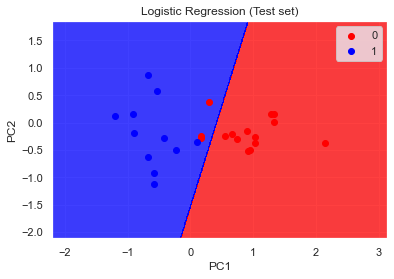

In [142]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()